In [23]:
import numpy as np
import pandas as pd
import os
import math

from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import accuracy_score
from scipy.stats import norm,skew
from sklearn import metrics

In [24]:
data = pd.read_csv('zoo.csv')
df2 = pd.read_csv('class.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [25]:
df2

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [26]:
# Check data type for each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [27]:
#lets try to assess missing values
data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [28]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [29]:
print(data.shape, df2.shape)

(101, 18) (7, 4)


In [30]:
# lets try to join both sets to show actual class names
df=pd.merge(data,df2,how='left',left_on='class_type',right_on='Class_Number')
df.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


(array([41., 20.,  5., 13.,  4.,  8., 10.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

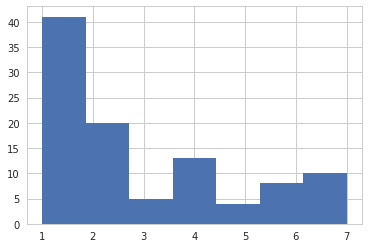

In [31]:
plt.hist(df.class_type, bins=7)

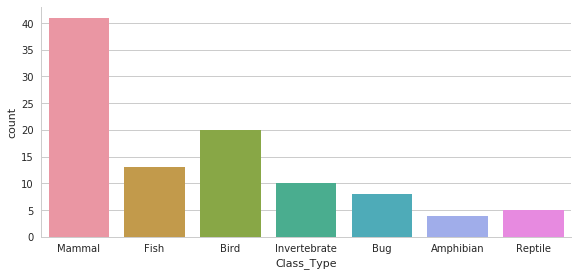

In [32]:
# lets see which class the most zoo animals belong to
sns.factorplot('Class_Type', data=df,kind="count", aspect=2)

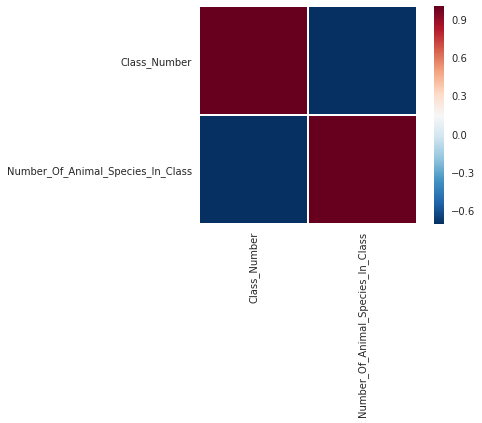

In [33]:
corr = df2.corr()
sns.heatmap(corr, square=True, linewidths=.3,cmap="RdBu_r")
plt.show()

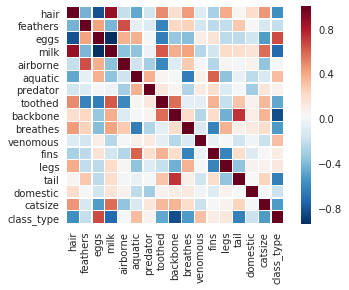

In [34]:
corr = data.corr()

sns.heatmap(corr, square=True, linewidths=.2,cmap="RdBu_r")
plt.show()

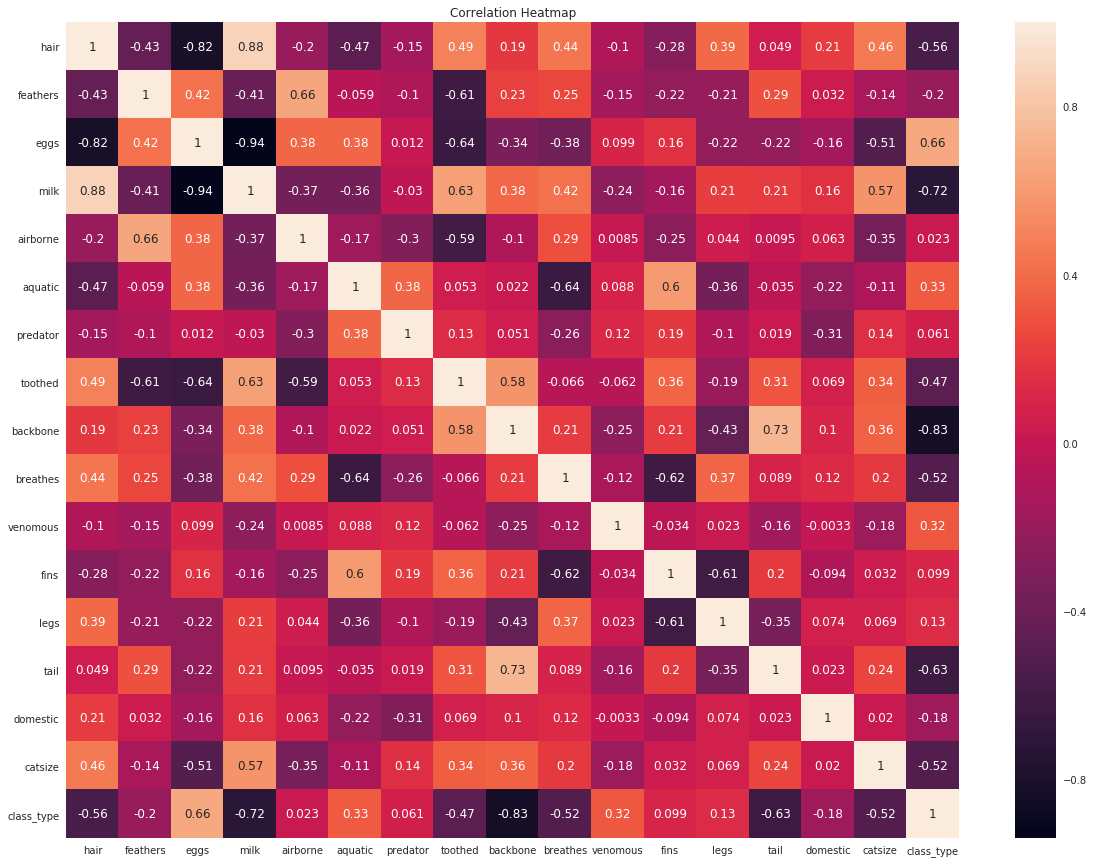

In [35]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = data.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [36]:
# show vairable correlation which is more than 0.7 (positive or negative)
corr_filt = corr[corr != 1][abs(corr)> 0.7].dropna(how='all', axis=1).dropna(how='all', axis=0)
print(corr_filt)

                hair      eggs      milk  backbone      tail  class_type
hair             NaN -0.817382  0.878503       NaN       NaN         NaN
eggs       -0.817382       NaN -0.938848       NaN       NaN         NaN
milk        0.878503 -0.938848       NaN       NaN       NaN   -0.723683
backbone         NaN       NaN       NaN       NaN  0.731762   -0.828845
tail             NaN       NaN       NaN  0.731762       NaN         NaN
class_type       NaN       NaN -0.723683 -0.828845       NaN         NaN


In [37]:
df.groupby('Class_Type').mean()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class
Class_Type,,,,,,,,,,,,,,,,,,,
Amphibian,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000,5.0,5.0,4.0
Bird,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000,2.0,2.0,20.0
Bug,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000,6.0,6.0,8.0
Fish,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692,4.0,4.0,13.0
Invertebrate,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000,7.0,7.0,10.0
Mammal,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488,1.0,1.0,41.0
Reptile,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000,3.0,3.0,5.0


In [44]:
from sklearn.model_selection import train_test_split
# 80/20 split
X = data.iloc[:,1:17]
y = data.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [45]:
print(X.shape,y.shape)

(101, 16) (101,)


# DECISION TREE

In [46]:
from sklearn.model_selection import cross_val_score


In [47]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
score_dt=cross_val_score(dt, X,y, cv=5)
score_dt


/home/sude/yes/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([1.        , 0.85714286, 0.9047619 , 0.94736842, 1.        ])

In [48]:
# The mean score and the 95% confidence interval of the score estimate are:
#print("Accuracy: %0.2f (+/- %0.2f)" % (score_dt.mean(), score_dt.std() * 2))

In [49]:
print("accuracy:" +str(score_dt.mean()))

accuracy:0.9418546365914786


# SVM

In [50]:

from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
score_svc=cross_val_score(svc, X,y, cv=5)
score_svc

/home/sude/yes/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([1.        , 0.95238095, 0.9047619 , 1.        , 0.94444444])

In [51]:
print("accuracy:" +str(score_svc.mean()))

accuracy:0.9603174603174602


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
score_lr=cross_val_score(lr, X,y, cv=5)
score_lr
#print('Accuracy:', round(score_lr, 2), '%.')


/home/sude/yes/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([1.        , 0.95238095, 0.9047619 , 0.94736842, 0.94444444])

In [53]:
print("accuracy:" +str(score_lr.mean()))

accuracy:0.9497911445279866


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 35,max_depth=7, random_state = 42)
score_rf=cross_val_score(rf,X,y, cv=5)
score_rf


/home/sude/yes/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


array([0.99412987, 0.99742528, 0.96956236, 0.91438991, 0.9569222 ])

In [55]:
print("accuracy:" +str(score_rf.mean()))

accuracy:0.9664859249920003


In [56]:


models = pd.DataFrame({
    'Model': ['Support Vector Machines',  'Decision Tree', 'Logistic Regression','Random Forest'],
    'Score': [score_svc.mean(), score_dt.mean(), score_lr.mean(), score_rf.mean()]})
models.sort_values(by='Score', ascending=False)



,Model,Score
3,Random Forest,0.966486
0,Support Vector Machines,0.960317
2,Logistic Regression,0.949791
1,Decision Tree,0.941855


After comparing the score of each model, the RF model seems to be the most accurate.

In [57]:
Model= ['Support Vector Machines',  'Decision Tree', 'Logistic Regression','Random Forest']
Score = [score_svc.mean(), score_dt.mean(), score_lr.mean(), score_rf.mean()]

In [58]:
print(Score)

[0.9603174603174602, 0.9418546365914786, 0.9497911445279866, 0.9664859249920003]


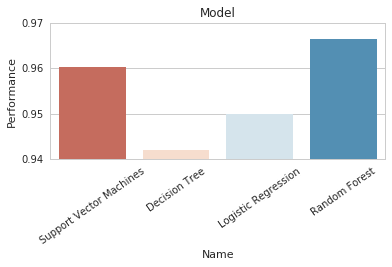

In [59]:
# Performance of models
fg,ax = plt.subplots(nrows=1,ncols=1,figsize=(6, 2.5))
sns.barplot(Model, Score,palette="RdBu")
plt.ylim(0.94, 0.97)
ax.set_ylabel("Performance")
ax.set_xlabel("Name")
ax.set_xticklabels(Model,rotation=35)
plt.title('Model')
